In [1]:
#imports
import sys
sys.path.append('/home/harry/personal/uni/project/individual/harry/model')

from model import *

feature_names = [
    'is_summer', 'is_autumn', 'is_winter', 'is_spring',
    'is_monday', 'is_tuesday', 'is_wednesday', 'is_thursday', 'is_friday', 'is_saturday', 'is_sunday',
    'is_weekday', 'is_weekend',
    'is_jan', 'is_feb', 'is_mar', 'is_apr', 'is_may', 'is_jun', 'is_jul', 'is_aug', 'is_sep', 'is_oct', 'is_nov', 'is_dec',
    'min_30_min_demand',
    'avg_30_min_demand',
    'max_30_min_demand',
    'avg_temp',
    'max_temp',
    'min_temp',
    'hd_next_24h',
    'cd_next_24h'
]

Using device: cuda

Final Metrics:
MSE: 55924684.3992
MAE: 4980.5304
RMSE: 7478.2808
MAPE: 1.3105


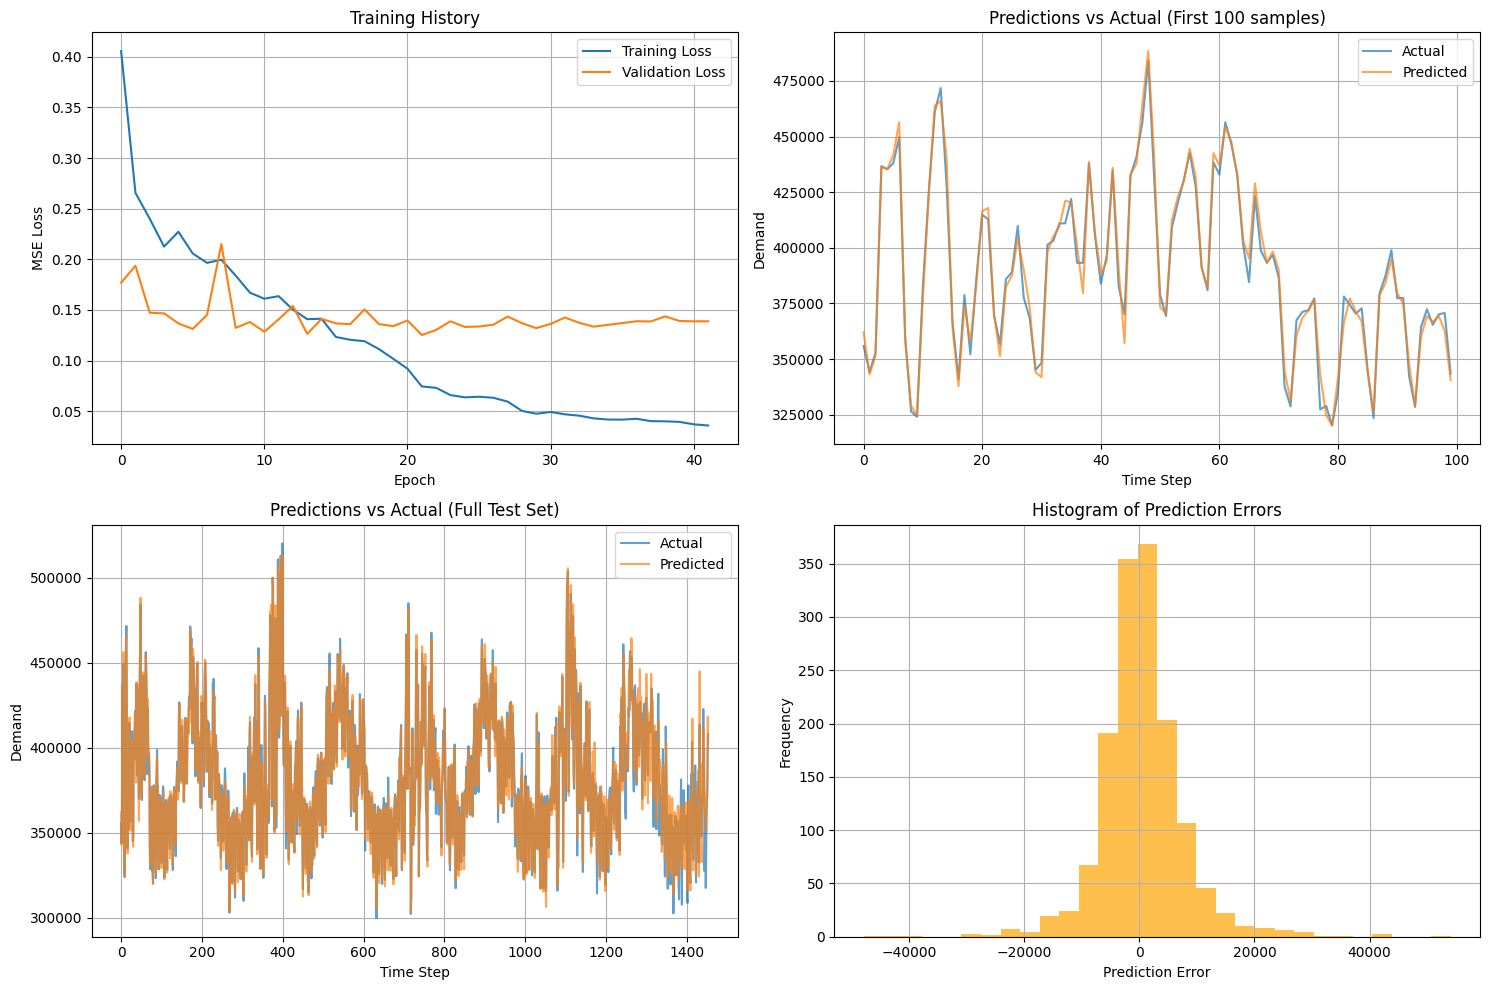

In [2]:
params = {
    'learning_rate': 0.001,
    'batch_size': 32,
    'seq_length': 7,
    'transformer_encoder_layer_params': {
        'd_model': 64,
        'nhead': 4,
        'dim_feedforward': 256,
        'dropout': 0.1,
        'activation': 'relu'
    },
    'transformer_layer_params': {
        'num_layers': 2,
    },
    'dataset': '2016-2019',
    'train_test_split': '80:20',
    'features': ['sum_30_min_demand'] + feature_names,
    'num_epochs': num_epochs,
    'patience': patience
}

input_dim = len(params['features'])

sequences, targets, datetimes, scaler_X = prepare_data(params)


model, train_losses, val_losses = train_transformer_model(
    sequences.numpy(), targets.numpy(), input_dim, datetimes, params
)

postprocess(model, sequences, targets, scaler_X, train_losses, val_losses, input_dim)
